In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r'/content/Fisher.csv')
df.head()

,Type,PW,PL,SW,SL
0,0,2,14,33,50
1,1,24,56,31,67
2,1,23,51,31,69
3,0,2,10,36,46
4,1,20,52,30,65


In [ ]:
df.isnull().sum()

Type    0
PW      0
PL      0
SW      0
SL      0
dtype: int64

In [ ]:
df.dtypes

Type    int64
PW      int64
PL      int64
SW      int64
SL      int64
dtype: object

In [ ]:
df['Type'].value_counts()

0    50
1    50
2    50
Name: Type, dtype: int64

In [ ]:
X = df.drop('Type', axis=1)
Y = df['Type']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=22)

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(Xtrain, Ytrain)
pred = GNB.predict(Xtest)
pred

array([0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
GNB = GaussianNB()
GNB.fit(Xtrain, Ytrain)
pred = GNB.predict(Xtest)

print(confusion_matrix(Ytest, pred))
print(accuracy_score(Ytest, pred))

[[12  0  0]
 [ 0 11  1]
 [ 0  1 13]]
0.9473684210526315


In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(Xtrain, Ytrain)
pred = MNB.predict(Xtest)

print(confusion_matrix(Ytest, pred))
print(accuracy_score(Ytest, pred))

[[12  0  0]
 [ 0 12  0]
 [ 0  1 13]]
0.9736842105263158


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', n_jobs=3)
KNN.fit(Xtrain, Ytrain)
pred = KNN.predict(Xtest)

print(confusion_matrix(Ytest, pred))
print(accuracy_score(Ytest, pred))


[[12  0  0]
 [ 0 12  0]
 [ 0  2 12]]
0.9473684210526315


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=7, min_samples_leaf=2,
                            class_weight={0:0.33 , 1:0.33, 2:0.33}, random_state=2)
DT.fit(Xtrain, Ytrain)
pred = DT.predict(Xtest)

print(confusion_matrix(Ytest, pred))
print(accuracy_score(Ytest, pred))

[[12  0  0]
 [ 0 11  1]
 [ 0  1 13]]
0.9473684210526315


In [ ]:
pred = DT.predict_proba(Xtest)
pred

array([[1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.

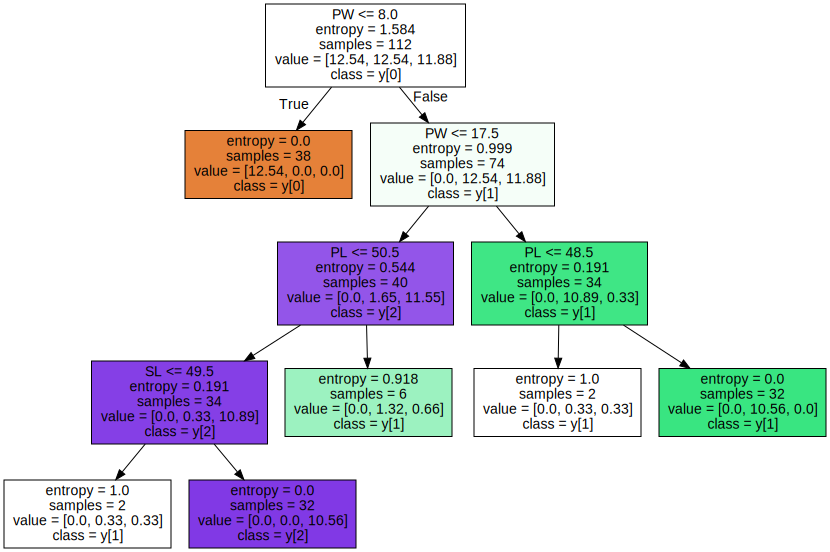

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(DT, out_file="tree.dot",class_names=True,feature_names=X.columns, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=200, random_state=2020, activation='relu', hidden_layer_sizes=(10,20),
                    learning_rate_init=0.01, learning_rate='invscaling')

MLP.fit(Xtrain, Ytrain)
pred = MLP.predict(Xtest)

print(confusion_matrix(Ytest, pred))
print(accuracy_score(Ytest, pred))

[[12  0  0]
 [ 0 12  0]
 [ 0  3 11]]
0.9210526315789473


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=200, random_state=2020, verbose=1, validation_fraction=0.1, 
                    activation='relu', hidden_layer_sizes=(10,20), early_stopping=True, n_iter_no_change=10,
                    learning_rate_init=0.01, learning_rate='invscaling')

MLP.fit(Xtrain, Ytrain)
pred = MLP.predict(Xtest)
print(confusion_matrix(Ytest, pred))
print(accuracy_score(Ytest, pred))

Iteration 1, loss = 4.57574620
Validation score: 0.166667
Iteration 2, loss = 2.98403357
Validation score: 0.166667
Iteration 3, loss = 2.21869511
Validation score: 0.250000
Iteration 4, loss = 1.06751614
Validation score: 0.833333
Iteration 5, loss = 0.71693971
Validation score: 0.833333
Iteration 6, loss = 0.69341120
Validation score: 0.500000
Iteration 7, loss = 0.73670193
Validation score: 0.583333
Iteration 8, loss = 0.74285015
Validation score: 0.583333
Iteration 9, loss = 0.64766129
Validation score: 0.583333
Iteration 10, loss = 0.52437414
Validation score: 0.666667
Iteration 11, loss = 0.39464339
Validation score: 0.833333
Iteration 12, loss = 0.30749344
Validation score: 0.916667
Iteration 13, loss = 0.28239924
Validation score: 0.916667
Iteration 14, loss = 0.27129237
Validation score: 0.916667
Iteration 15, loss = 0.24199492
Validation score: 0.833333
Iteration 16, loss = 0.22003061
Validation score: 0.833333
Iteration 17, loss = 0.21708780
Validation score: 0.833333
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid featu

In [ ]:
from sklearn.svm import SVC
SV_model = SVC(kernel='linear', gamma=0.01, degree=3, C=0.1, class_weight='balanced')
SV_model.fit(Xtrain, Ytrain)
pred = SV_model.predict(Xtest)

print(confusion_matrix(Ytest, pred))
print(accuracy_score(Ytest, pred))

[[12  0  0]
 [ 0 12  0]
 [ 0  0 14]]
1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', class_weight='balanced', fit_intercept=True)
LR.fit(Xtrain, Ytrain)
pred = LR.predict(Xtest)

print(confusion_matrix(Ytest, pred))
print(accuracy_score(Ytest, pred))

[[12  0  0]
 [ 0 12  0]
 [ 0  1 13]]
0.9736842105263158


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
df = pd.read_csv(r'/content/sample_data/california_housing_train.csv')
X = df.drop('median_house_value', axis=1)
Y = df['median_house_value']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=22)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5, weights='uniform', n_jobs=3)
KNN.fit(Xtrain, Ytrain)
pred = KNN.predict(Xtest)
pred

array([134540., 222360.,  93120., ..., 111300., 142200., 147840.])

In [ ]:
from sklearn.metrics import mean_squared_error
KNN_R = KNeighborsRegressor(n_neighbors=5, weights='uniform', n_jobs=3)
KNN_R.fit(Xtrain, Ytrain)
pred = KNN_R.predict(Xtest)

print(mean_squared_error(Ytest,pred))

10152217399.51469


In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT_R = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_split=7, min_samples_leaf=2, random_state=2)
DT_R.fit(Xtrain, Ytrain)
pred = DT_R.predict(Xtest)

print(mean_squared_error(Ytest,pred))

5314964628.237491


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [ ]:
from sklearn.neural_network import MLPRegressor
MLP_R = MLPRegressor(max_iter=200, random_state=2020, activation='relu', hidden_layer_sizes=(10,20),
                    learning_rate_init=0.01, learning_rate='invscaling')
MLP_R.fit(Xtrain, Ytrain)
pred = MLP_R.predict(Xtest)

print(mean_squared_error(Ytest,pred))

4926882858.3314705


In [ ]:
from sklearn.svm import SVR
SV_R = SVR(kernel='rbf', C=1.2)
SV_R.fit(Xtrain, Ytrain)
pred = SV_R.predict(Xtest)

print(mean_squared_error(Ytest,pred))

14066206806.332731


In [ ]:
from sklearn.linear_model import LinearRegression
REG = LinearRegression(fit_intercept=True, n_jobs=3)
REG.fit(Xtrain, Ytrain)
pred = REG.predict(Xtest)

print(mean_squared_error(Ytest,pred))

5077868057.887048


In [ ]:
REG.coef_

array([-4.24437489e+04, -4.23343383e+04,  1.17669370e+03, -6.14566806e+00,
        1.03281312e+02, -5.05016065e+01,  7.80746792e+01,  4.03406705e+04])